# Neural Network Regression With `TensorFlow`

### Introduction 

What is a regression problem? Examples:

* Predicting how much a house will sell for.
* Predicting how many people will buy a new app.
* Predicting how much your health insurance will be.

The key part of a regression problem is predicting a number of some sort. The outcome (target) needs to be a numerical value, as apposed to a binary or multinomial outcome, which is a classification problem. 

Regression analysis is a set of statistical processes for estimating the relationships between the dependent variable (outcome) and one or more independent variables (predictors, features, covariates). 

What will we cover?

* Architecture of a NN regression model
* Input and output shapes of a regression model
* Creating custom data to view and fit
* Steps in modelling:
  * Creating, compiling, fitting, and evaluating
* Different evaluation methods
* Saving and loading models 

### Regression Inputs & Outputs 

What will the inputs to the algorithm be? And what will the algorithm give us as an output?

If we are trying to predict the price of a house, for example, the inputs (predictors, features) could be:

* Number of bedrooms
* Number of bathrooms
* Number of garages 

We could then one-hot encode the predictors to make sure that they have numerical encoding. 

For the output, the output would be a predicted price. So, for example, it would tell us we would need to offer $939,700 for a house. The predicted output comes from looking at many actual outputs. This is considered supervised learning. 

During machine learning, we will be focused on defining/working with our inputs and outputs. The input and output will be in the form of tensors. In our example, we the shape of the inputs is 3 (bedroom, bathroom, garage) and the output shape will be 1 since it will just give us predicted price. For each example, we will have 3 inputs and 1 output. 

### Anatomy & Architecture of a NN Regression Model

Every NN you build, will have an input layer, some number of hidden layers, and an output layer. The hidden layers learn patterns in the data. There could be a few hidden layers or hundreds. The more hidden layers, the more deep the NN is. The hidden layer is where pattersn and weights are learned in the data.

What will the architecture of a regression model look like?

* Input layer shape (same as the number of input features)
* Hidden layers (problem specific; minimum = 1, maximum = unlimited)
* Neurons per hidden layer (problem specific; usually 10 to 100)
* Output layer shape (same as desired prediction shape)
* Hidden activation (usually ReLU)
* Output activation (None, can be ReLU, logistic, tanh)
* Loss function (MSE, MAE, Huber Loss; measures how far off our prediction is from the provided actual prediction; we will be trying to reduce the loss function)
* Optimizer (SGD, Adam; will tell the NN how to improve the parameters so the loss function decreases) 

We will go more in-depth about each of these things while going through the tutorial. 

### Creating Sample Regression Data (So We Can Model It)

There are many definitions for a regression problem, but in our case, we are going to simplify it. We are going to predict a numerical variable based on some other combination of variables. We are predicted a number based on some other numbers. 

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


### Creating Data to View and Fit

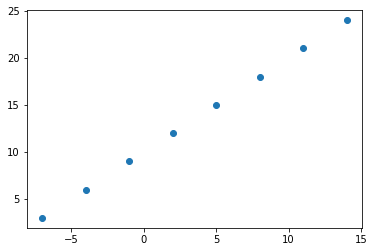

In [2]:
# Importing other libraries
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In the relationship we created above, $y = x + 10$. 

In [3]:
# Double check
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

This is the relationship that we would want our NN to learn between our independent variable and dependent variable.

In [4]:
# Create a demo tensor for our housing prediction problem for looking at input and output shapes
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Checking input shape of X and y
input_shape = X.shape
output_shape = y.shape
X.shape, y.shape

((8,), (8,))

Why is the input and output shapes of `X` and `y` 8 instead of 1 for each? We will have $X1$ to predict $y1$. 

In [6]:
# We can try but it will be empty; this is because these are scalars (rank 0)
X[0].shape, y[0].shape, X[0].ndim, y[0].ndim

((), (), 0, 0)

In [7]:
# Turn our numpy arrays into tensors
# X amd y have 1 dimensions since they are vectors
X = tf.constant(X)
y = tf.constant(y)
X, y, X.ndim, y.ndim

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 1,
 1)

In [8]:
# Check shapes of tensor form; still gives nothing since they are scalars (rank 0)
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in Modelling With `TensorFlow`

1. **Creating a model** - define input, output, and hidden layers.
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model.
3. **Fitting a model** - letting the model try to find patterns between `X` and `y` (features and labels).

In `TensorFlow` we will:

1. Get the data ready (turn into tensors).
2. Build or pick a pretrained model for our problem
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create features
X = tf.cast(np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0]), dtype = tf.float32)

# Create labels
y = tf.cast(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]), dtype = tf.float32)

# 1. Create a model using the Sequential API
# In TensowFor, you can use a squential API or 

# Create a model and sequentially go through the following
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Input 1 number and predict 1 number
]) 

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # MAE is short for mean absolute error 
              optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent 
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 

# An epoch is when all the training data is used at once and is defined as the total 
# number of iterations of all the training data in one cycle for training the machine learning model. 
# Another way to define an epoch is the number of passes a training dataset takes around an algorithm.

Epoch 1/5
1/1 [==============================] - 0s 298ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
model.predict([17.0]) # Predict y for X = 17

1/1 [==============================] - 0s 81ms/step


array([[12.716021]], dtype=float32)

Our model is pretty far off. However, we can see from running our model above and looking at the MAE that our model is consinsistently predicting far off.

You can also write creating the model using:

* `model = tf.keras.Sequantial()` 
* `model.add(tf.keras.layers.Dense(1))`

With a squential model, you can use the `.add` method like above or make a list, like we did in the code block above this text. 

What does `tf.expand_dims()` do? `expand_dims()` is used to insert an addition dimension in input Tensor.

In [12]:
# Display expand_dims
# The -1 means we are expanding the dimensions of the last axis 
# So we are making a row vector into a column vector with 8 rows and 1 column
X, X.shape, tf.expand_dims(X, axis = -1), tf.expand_dims(X, axis = -1).shape

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]),
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 TensorShape([8, 1]))

In [13]:
# Another example: this will add a row to the 2x3 matrix

# Importing the library
import tensorflow as tf
 
# Initializing the input
x = tf.constant([[2, 3, 6], [4, 8, 15]])
 
# Printing the input
print('x:', x)
print('x shape:', x.shape)
 
# Calculating result
res = tf.expand_dims(x, 1)
 
# Printing the result
print('res: ', res)
print('res shape:', res.shape)

x: tf.Tensor(
[[ 2  3  6]
 [ 4  8 15]], shape=(2, 3), dtype=int32)
x shape: (2, 3)
res:  tf.Tensor(
[[[ 2  3  6]]

 [[ 4  8 15]]], shape=(2, 1, 3), dtype=int32)
res shape: (2, 1, 3)


In [14]:
# Another example:

# Importing the library
import tensorflow as tf
 
# Initializing the input
x = tf.constant([[2, 3, 6], [4, 8, 15]])
 
# Printing the input
print('x:', x)
print('x shape:', x.shape)
 
# Calculating result
res = tf.expand_dims(x, 0)
 
# Printing the result
print('res: ', res)
print('res shape:', res.shape)

x: tf.Tensor(
[[ 2  3  6]
 [ 4  8 15]], shape=(2, 3), dtype=int32)
x shape: (2, 3)
res:  tf.Tensor(
[[[ 2  3  6]
  [ 4  8 15]]], shape=(1, 2, 3), dtype=int32)
res shape: (1, 2, 3)


### Steps In Improving a Model With `TensorFlow` Part 1

We are trying to model the relationship between X and Y. We created a model, compiled it, and then fit the model, but it did not perform very well.

Steps in modelling again:

1. Construct or import pretrained model
2. Compile the model (prepare it to be used with data)
  * Loss - how wrong your model's predictions are compared to truth labels
  * Optimizer - how youe model should update its internal patterns to better its predictions
  * Metrics - human interpretable values for how well your model is doing
3. Fit the model to the training data so it can discover patterns
  * Epochs - how many times the model will go through all of the training examples.
4. Evaluate the model on the rest data. How reliable are our model's predictions? 

So, how will we improve our model? What are some steps we could do to perform our model's performance? We can alter the steps we took to create a model.

1. **Creating a model:** Add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation functions of each layer.  
2. **Compiling a model:** Might change the optimization functions and the learning rate hyperparameter.
3. **Fitting a model:** fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from). 

### Steps In Improving a Model With `TensorFlow` Part 2

So, let's make a larger model. We will increase the number of hidden layers, add more neurons to the hidden layers, set the activation functions, adjust the learning rate, and increase the number of epochs. 



In [15]:
# Set random seed
tf.random.set_seed(42)

# Create features
X = tf.cast(np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0]), dtype = tf.float32)

# Create labels
y = tf.cast(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]), dtype = tf.float32)

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model (this time will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 255ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

Our previous model stopped after 5 epochs and it has an MAE of about 10.5. After 100 epochs, our MAE is about 6.9. 

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[30.158512]], dtype=float32)

In [18]:
# Another model change for practice
# Adding a hidden layer 

# Set random seed
tf.random.set_seed(42)

# Create features
X = tf.cast(np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0]), dtype = tf.float32)

# Create labels
y = tf.cast(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]), dtype = tf.float32)

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = "relu")) # Adding a hidden layer with relu activation
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # This can also just be just "mae"
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model (this time will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 1s 549ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 8ms

In [19]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 136ms/step


array([[31.382648]], dtype=float32)

### Steps In Improving a Model With `TensorFlow` Part 3

It seems like our previous model is performing better. This might be because of overfitting: our model is fitting so well to the training data that it models the noise in the data rather than actual patterns. Thus, when a new value for x is presented, the prediction is off. The MAE from the training data is kind of irrelevant regarding performance. We are more concerned about model performance on data the model has never seen before (the testing data). 

As a note, common ways to change a model are (these are called hyperparameters). Parameters are what the model learns and we do not code for ourselves. Some hyperparameters are:

* Increasing the number of epochs
* Adding hidden layers
* Changing activation functions
* Changing the optimizer 
* Change the number of hidden units in the hidden layers
* Change the learning rate (potentially the most important hyperparameter you can change for your NN)
* Changing the loss function
* Fitting on more data (we only have 8 examples in this example)

### Evaluating A `TensorFlow` Model Part 1 (Visualize)

In practice, a fairly common workflow when building NNs is:

1. Build a model
2. Fit it
3. Evaluate it
4. Tweak a model
5. Fit it
6. Evaluate it
7. Repeat tweaking, fitting, and evaluating

What should visualize when evaluating a model? It is a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself-  what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do predictions of a model line up against the ground truth?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset
# Can do y = X + 10 or: 
y = tf.add(X, 10)
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

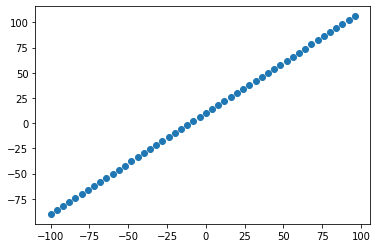

In [22]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### Evaluating a Model Part 2: The 2 (or 3) Sets

This is splitting the data into a training set and a test set. In this example, 80% of the data will be used for the training set and 20% will be used for the test set.

The 3 types of sets are:

* Training - the model learns from this data, which is typically 70-80% of the total data you have.
* Validation - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data.

Many times, you will only use a training set and a test set, with the validation set being dropped. 

A good way to think about these 3 datasets is:

* Course materials in college (training set)
* Practice exam (validation set)
* Final exam (test set) 

We want our algorithm to learn from the training set so it performs well on the testing set.

In [23]:
# Check length of how many samples we have
len(X)

50

In [24]:
# Making the training set - 80%
# So test set will be 20%
# Splitting the data
X_train = X[:40] # First 40 are training samples 
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we have our data in training and test sets, let's visualize it again.

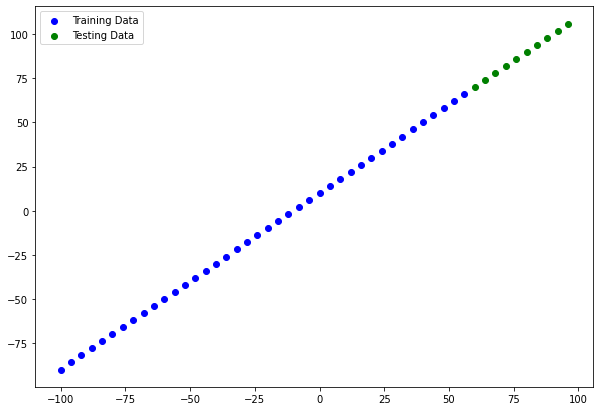

In [25]:
# Plotting
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing Data")
# Show a legend
plt.legend();

### Evaluating the Model Part 3: Get the Model Summary



In [26]:
# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

### Visualize the Model

We can get an idea of what our model looks like before even training it. 

If you try running `model.summary()`, you will get an error if it has not been built or fit. Can specify the `input_shape` argument in the first laters for an automatic build.

In [27]:
# Let's create a model which builds automatically by defining the input shape 
# Argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = [1])) # We find the input shape by
# Determining how many numbers we are inputting 
# In this case, we are inputting 1 number to predict 1 number

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Check out the summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `model.summary()` will show use the layers it contains, the output shape, and the number of parameters of each layer.

The output shape for this NN is 1 cause for 1 input we want 1 output. 

* Total params - the total number of parameters in the model. These are the patterns that the model is going to learn. 
* Trainable params - these are the parameters (patterns) the model can update as it trains. 
* Non-trainable params - these parameters are not updated during training (this is typicaly when you bring in already learned patterns or parameters from other models during transfer learning). 

If you wanna have a look at what the actual parameters are in a dense layer, you will look at a weights matrix and bias vector. Weights and biases are the trainable params in an NN. 

* Weights and biases (commonly referred to as w and b) are the learnable parameters of a some machine learning models, including neural networks.
* Weights control the signal (or the strength of the connection) between two neurons. In other words, a weight decides how much influence the input will have on the output.
* Biases, which are constant, are an additional input into the next layer that will always have the value of 1. Bias units are not influenced by the previous layer (they do not have any incoming connections) but they do have outgoing connections with their own weights. The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron.

***Exercise:*** Try playing around with the number of hidden units and see how that affects the number of parameters (total and trainable) by calling `model.summary()`. 

In [28]:
# Let's create a model which builds automatically by defining the input shape 
# Argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape = [1])) # We find the input shape by
# Determining how many numbers we are inputting 
# In this case, we are inputting 1 number to predict 1 number

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Check out the summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Let's create a model which builds automatically by defining the input shape 
# Argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(25, input_shape = [1])) # We find the input shape by
# Determining how many numbers we are inputting 
# In this case, we are inputting 1 number to predict 1 number

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Check out the summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 25)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


It seems that there are 2 trainable parameters per hidden unit when the input size is 1. The 2 trainable parameters are the weight and bias per neuron. 3 neurons multiplied by 2 parameters per neuron = 6 trainable parameters, for example.

In [30]:
# Fitting our model to the training data 

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape = [1]))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)
# verbose = 0 makes it silent so that there is no output
# verbose = 1 makes a progress bar
# there is also verbose 2

In [31]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Evaluating a Model Part 4: Plot the Model's Layers

Now, we will look at visualizing our model's layers. When you use `model.summary()` and see `Model: "sequential_14"`, it means we have created, in this case, 14 models.

We can also plot visualize our model using the `plot.model` function.


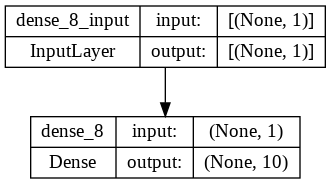

In [32]:
# Importing
from tensorflow.keras.utils import plot_model

# Plotting model
plot_model(model=model, show_shapes=True)

This `plot_model()` function will be very helpful when we start building more and more complex models. 

In [33]:
# Fitting our model to the training data 

# 1. Create a model
model = tf.keras.Sequential(name = "Model_1")
model.add(tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Getting the summary
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Fitting the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

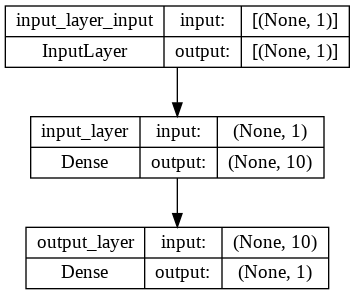

In [35]:
# Plotting 
plot_model(model=model, show_shapes=True)

For the model above, the input layer takes 1 input and gives 1 output. The hidden layer takes an 1 input and gives 10 outputs. The last layer takes 10 inputs and gives 1 output. 

### Evaluating a Model Part 5: Visualizing Predictions

In this section, we are going to explore how to visualize a model's predictions. It is a good idea to plot the model's predictions against the ground truth labels.

In practice, you will often see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model predictions).

In [36]:
# Make some predictions
# In an ideal world, these would be the exact same numbers 
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[ 75.97808 ],
       [ 80.92624 ],
       [ 85.874405],
       [ 90.822556],
       [ 95.77073 ],
       [100.71888 ],
       [105.667046],
       [110.61521 ],
       [115.56337 ],
       [120.51153 ]], dtype=float32)

In [37]:
# Ground truth labels
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

If you feel like youre going to reuse some functionality in the future, it is a good idea to turn it into a function. 

In [38]:
# Building a plotting function to visualize predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))
# Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
# Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
# Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
# Show the legend
  plt.legend();

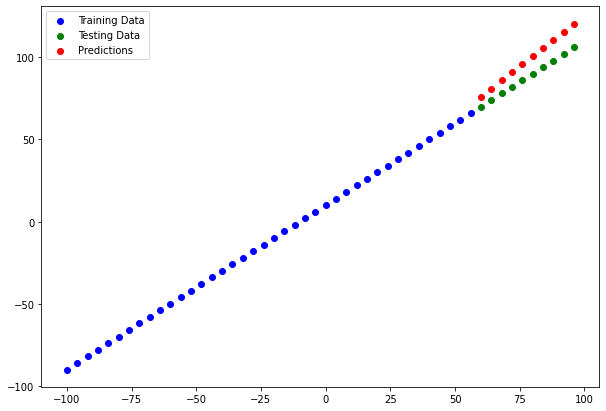

In [39]:
# Plot 
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

It is a nice plot and shows us how the model is performing in a visual way and is very easy to understand. In an ideal world, the predictions (red) would completely overlap the actual data (green). 

### Evaluating Our Model's Predictions With Regression Evaluation Metrics

Depending on the problem you are working on, there will be different evaluating metrics to evaluate your model's performance.

Since we are working on a regression problem, 2 of the main metrics you will see are:

* Mean absolute error - on average, how wrong is each of my model's predictions (`tf.keras.losses.MAE()`). Great start metric for any regression problem.
* Mean square error - square the average errors (`tf.keras.losses.MSE()`). When larger errors are mode signficant than smaller errors. 
* Huber loss (`tf.keras.losses.Huber`()). Combination of MSE and MAE. Less sensititve to outliers than MSE. 

First, let's do a quick reminder of the model we are using:

In [40]:
# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

In [41]:
# Show model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


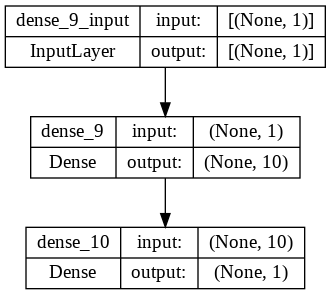

In [42]:
# Plot the model
plot_model(model=model, show_shapes=True)

In [43]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[58.188526],
       [62.02153 ],
       [65.854546],
       [69.687546],
       [73.52055 ],
       [77.35357 ],
       [81.18658 ],
       [85.019585],
       [88.8526  ],
       [92.68561 ]], dtype=float32)

In [44]:
# Evaluate the model on the test set
# The metric comes from compiling the model, where we set the loss and metrics
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 292ms/step - loss: 12.5629 - mae: 12.5629


[12.562936782836914, 12.562936782836914]

In [45]:
# Another way to evaluate predictions
# Compare y_pred to y_test
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.811474 , 25.97847  , 22.145454 , 18.312454 , 15.1835575,
       12.787859 , 11.125369 , 10.196083 , 10.       , 10.537122 ],
      dtype=float32)>

The output is different because `y_true` and `y_pred` are not in the same shape. When we run evaluating metrics, they need to be of the same shape.

In [46]:
# Remove the single dimensions from y_pred
y_pred_squeezed = tf.squeeze(y_pred)

In [47]:
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_squeezed)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.562937>

In [48]:
# Another way using reshaping instead of squeeze
y_pred_rs = tf.reshape(y_pred, shape = (10,))

In [49]:
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_rs)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.562937>

In [50]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_squeezed)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=158.05742>

In [51]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_rs)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=158.05742>

In [52]:
# Making a function for MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, 
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, 
                                        y_pred=tf.squeeze(y_pred))

### Setting Up `TensorFlow` Modelling Experiments (Part 1)

How do we get the error values lower? How do we make our predictions better? 

In the next few videos, we will be conducting experiments to see how we can improve our predictions.

We will:

1. Get more data - more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give the model more of a chance to find patters in the data. 

In [53]:
# Our dataset
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In this example, we will pretend we cannot get more data. So, instead, we will make a more complex model and train it for longer. 

Will do 3 modelling experiments:

1. `model_1` - the same as the original model, 1 layer, but trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [54]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 61ms/step


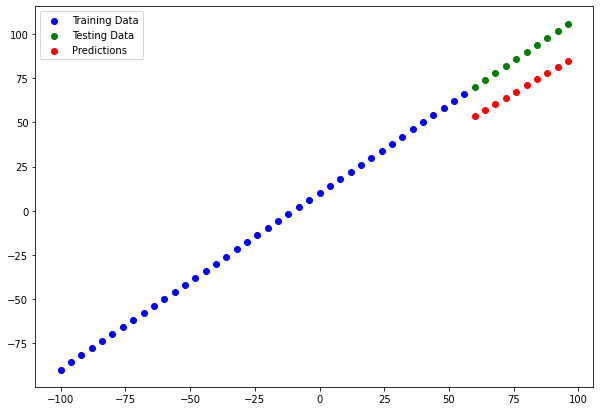

In [55]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [56]:
# Calcuate MAE and MSE
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Setting Up An Experiment Part 2

In [57]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10, activation = "relu"))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])
# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 40.1125 - mse: 2668.5708
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9403 - mse: 231.0229
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 19.2608 - mse: 761.7747
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 5.7330 - mse: 56.5120
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0002 - mse: 150.2813
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.9637 - mse: 85.3112
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.9858 - mse: 186.8156
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7345 - mse: 249.7980
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 24.8812 - mse: 1096.8666
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1528 - mse: 224.7119
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 54ms/step


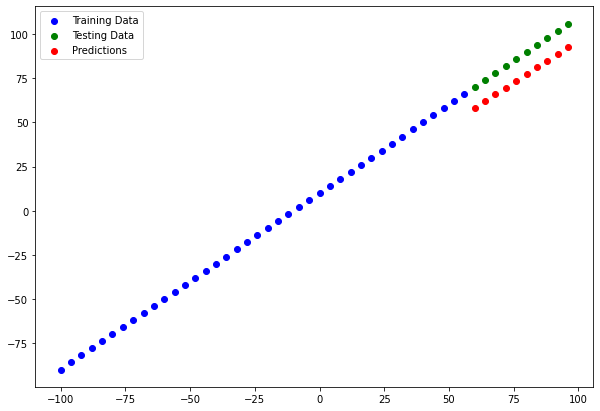

In [58]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [59]:
# Calculate MAE and MSE
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=12.515959>,
 <tf.Tensor: shape=(), dtype=float32, numpy=156.87785>)

Now, we will train the final model with 2 layers but for 500 epochs.

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10, activation = "relu"))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])
# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 43ms/step


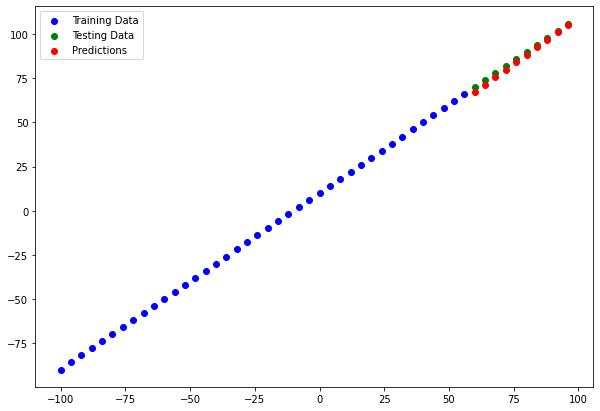

In [61]:
# Make and plot predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [62]:
# Calculate MAE and MSE
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6697861>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.2901444>)

As a note, if you make a model too complicated, it can result in overfitting. There is an example below. Overfitting means it models the training data too well and it does not generalize well to data it has not seen before.

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(10, activation = "relu"))
model_4.add(tf.keras.layers.Dense(10, activation = "relu"))
model_4.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])
# 3. Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 1000, verbose = 0)

1/1 [==============================] - 0s 48ms/step


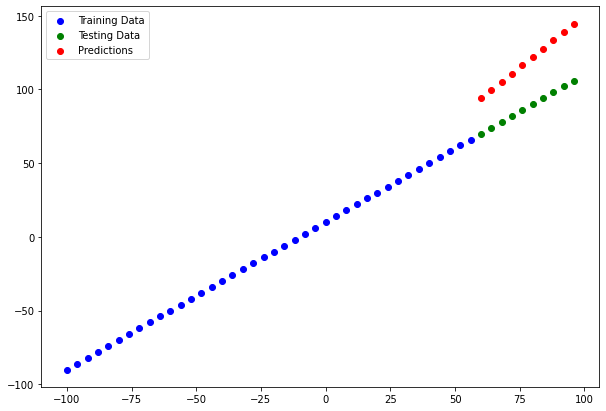

In [64]:
# Make and plot predictions
y_pred_4 = model_4.predict(X_test)
plot_predictions(predictions = y_pred_4)

In [65]:
# Calculate MAE and MSE
mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=31.233692>,
 <tf.Tensor: shape=(), dtype=float32, numpy=997.8677>)

### Comparing the Results of Our Experiments

Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

We have run a few experiments, now let's compare the results. 

In [66]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

# We are adding .numpy() to only select the value and not all the attributes
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_1.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,12.515959,353.573364
2,model_3,1.669786,3.290144
3,model_4,31.233692,997.867676


Looks like `model_3` performed the best.

Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which do and don't work. When you know this, you will get closer to figuring out what does work. It takes a lot of trial and error. But, also remember that making a model extremely complicated can result in overfitting. 

### Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments. When doing so, it can be tedious if you are running lots of experiments. Luckily, there are tools to help us.

As you build more models, you will want to look into using:

* TensorBoard - a component of the `TensorFlow` library to help track modelling experiments (we will see this later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving a `TensorFlow` Model

Saving our models allows us to use them outside of Google Colab or wherever they were trained, such as in a web application or mobile app. 

There are 2 major formats in `TensorFlow` to save models:

1. `SavedModel` format (default)
2. `HDF5` format

In [67]:
# Save a model using the SavedModel format
# Probably best when will be using the model in tensorflow
model_3.save("best_model_SavedModel_format")

In [68]:
# Save a model in the HDF5 format
# This is a hierarchical data format 
# HDF5 is probably better when not using the model in tensorflow
model_3.save("best_model_HDF5_format.h5")

### Loading A Model & Using It




In [69]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Check model_3 summary
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Saving the model will result in the patterns (parameters the model learned) being saved as well. Let's check if this is true by making predictions with our saved model and previous model (`model_3`).

In [71]:
# Compre model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# Calculate MAE
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

As we can see, our saved and loaded version of `model_3` gives us the same prediction and MAE as our actual `model_3`.

In [73]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [74]:
# Get the summary
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Check predictions if loaded .h5 match model_3
model_3_preds = model_3.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_3_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 39ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Putting Together What We Have Learned Part 1: Preparing a Larger Dataset

In [76]:
# Our current data
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [77]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [78]:
# Read in the insurance dataset from GitHub
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
# Checking the shape
insurance.shape

(1338, 7)

Our dependent variable (outcome) is `charges` and our predictors (features) are everything else. 

Before we start building the model, we need to preprocess the data. For example, `sex`, `smoker`, and `region` need to be one-hot encoded. 

In [80]:
# Using pandas for one-hot encoding
insurance_dum = pd.get_dummies(insurance)
insurance_dum.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [81]:
# Create X and y values (features and labels)
X = insurance_dum.drop("charges", axis = 1)
y = insurance_dum['charges']

In [82]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [83]:
# View Y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [84]:
# Create training and test sets
# We will use scikit learn to make a random train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [85]:
# Build a neural network (sort of like the ones we did above)

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10, activation="relu"))
insurance_model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
# We do not need to reformat into tensors since pandas is built on top of numpy
# So tensorflow automatically knows how to work with numpy arrays
insurance_model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8740.4277 - mae: 8740.4277
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7858.0439 - mae: 7858.0439
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.1973 - mae: 7613.1973
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7803.1304 - mae: 7803.1304
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7685.9766 - mae: 7685.9766
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7598.8950 - mae: 7598.8950
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7574.9692 - mae: 7574.9692
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7692.7188 - mae: 7692.7188
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7593.7910 - mae: 7593.7910
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7665.7329 - mae: 7665.7329

In [86]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8326.4160 - mae: 8326.4160


[8326.416015625, 8326.416015625]

Right now it looks like our model is not performing too well. So, let's try to improve it.

To try and improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and using Adam optimizer
2. Same as above but train for longer (200 epochs)

In [87]:
# Let's improve our model - adding an extra layer

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100, activation="relu"))
insurance_model_2.add(tf.keras.layers.Dense(10, activation="relu"))
insurance_model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13311.6846 - mae: 13311.6846
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.6064 - mae: 13345.6064
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.2676 - mae: 13345.2676
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.9248 - mae: 13344.9248
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.5859 - mae: 13344.5859
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.2451 - mae: 13344.2451
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.9053 - mae: 13343.9053
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13343.5664 - mae: 13343.5664
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13343.2236 - mae: 13343.2236
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.88

In [88]:
# Check the results of the improved insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12934.3340 - mae: 12934.3340


[12934.333984375, 12934.333984375]

If you ever see your losses as `nan`, then there is probably something wrong with your model. 

In [89]:
# Setting optimizer to adam

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100, activation="relu"))
insurance_model_2.add(tf.keras.layers.Dense(10, activation="relu"))
insurance_model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [90]:
# Check the results of the improved insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6179.7822 - mae: 6179.7822


[6179.7822265625, 6179.7822265625]

In [91]:
# Running for more epochs

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3= tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100, activation="relu"))
insurance_model_3.add(tf.keras.layers.Dense(10, activation="relu"))
insurance_model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [92]:
# Check the results of the improved insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3742.2112 - mae: 3742.2112


[3742.211181640625, 3742.211181640625]

Text(0.5, 0, 'epochs')

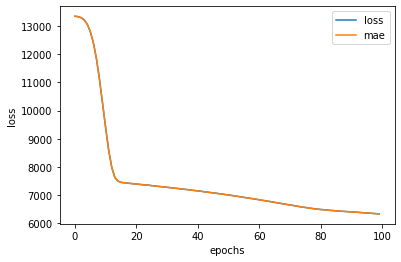

In [93]:
# Plotting a learning curve from our model 2 history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

It is great to visualize the loss curve. We want the loss curve to go down because that means our model is learning better and is less and less wrong as the number of epochs increase.

After seeing this, how long should you train the model for? 

It really depends. Really, it depends on the problem you are working on. However, many people have asked this question before, so `TensorFlow` has a solution. It's called the Early Stopping Callback, which is a `TensorFlow` component you can add to your model to stop training once it stops improving a certain metric. 

### Preprocessing Data With Feature Scaling Part 1: What is Feature Scaling?

This is normalizing or standardizing features. NNs tend to prefer normalization. 

* Normalization - a technique often applied as part of data preparing. The goal of normalization is to change values of numeric columns to a common scale without distorting values.

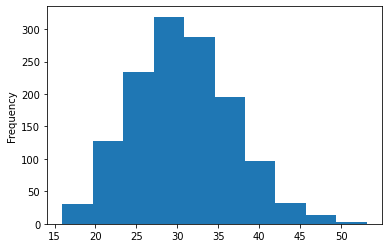

In [94]:
# Values for age column
X["bmi"].plot(kind='hist')

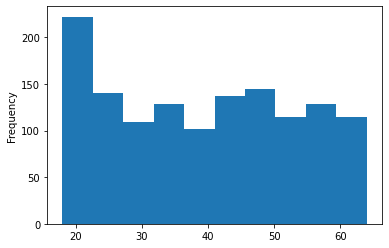

In [95]:
X["age"].plot(kind='hist')

As you can see, ranges for the values of our features is drastically different. 

* Scale (also referred to as normalization) - converts all values between 0 and 1 while preserving the original distribution. In `Sci-Kit` learn the function is `MinMaxScalar`. We will use this with neural networks.
* Standardization - Removes the mean and divides each values by the standard deviation. In `Sci-Kit` learn the function is `StandardScalar`. This transforms a feature to have close to normal distribution. As a note, this reduces the effect of outliers. 

Let's start from scratch and see the preprocessing in action.

In [96]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# Read in the insurance dataset from GitHub
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare out data, we can borrow a few classes from `Scikit-Learn`.

In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values between these columns 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the column transformer to the training data
# You always fit the column transformer to the training data and then use it to transform your test data
# The test data is data the model has never seen before 
# If we transform our training data with information from the test set, it is like taking information
# From the future
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [99]:
# Checking what our data looks like now
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [100]:
# Check the shapes
X_train.shape, X_train_normal.shape 
# The normalized/one-hot encoded data will have more columns

((1070, 6), (1070, 11))

Now our data is normalized and one-hot encoded. Now, let's build a NN model on our data.

In [101]:
# Make model with new preprocessed data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_norm= tf.keras.Sequential()
insurance_model_norm.add(tf.keras.layers.Dense(100, activation="relu"))
insurance_model_norm.add(tf.keras.layers.Dense(10, activation="relu"))
insurance_model_norm.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_norm.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
hist_norm = insurance_model_norm.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [102]:
# Evaluate our insurance model trained on normalized data
# Becuase we trained our model on normalized data, it must be evaluated on normalized data
insurance_model_norm.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3190.1238 - mae: 3190.1238


[3190.123779296875, 3190.123779296875]

Text(0.5, 0, 'epochs')

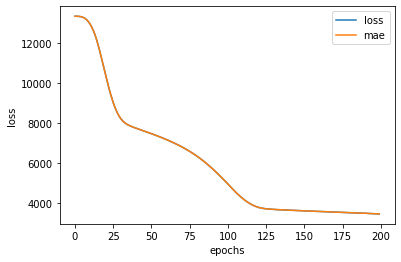

In [103]:
# Plotting a learning curve from our model from normalized data history
pd.DataFrame(hist_norm.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

One of the main benefits of normalization is we see a faster convergence time, meaning it gets to a better result faster. 